## Modelo 1 y 2: Preparación de los datos

In [20]:
# import libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
## Read data from local folder
data_path = 'Data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)

rows, cols = df.shape
print(f'Total {rows=}')
print(f'Total {cols=}')

df.head()

Total rows=7043
Total cols=21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
"""
As sain in data description from Kaggle, the dataset includes:

* Customers who left within the last month - the column is called Churn
* Services that each customer has signed up for - phone, multiple lines,
internet, online security, online backup, device protection, tech support, 
and streaming TV and movies
* Customer account information - how long they've been a customer, contract, 
payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers - gender, age range, and if they have partners and dependent
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [24]:
## Identify binary variables with yes or no answers
id_vars = ['customerID']
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_vars = [col for col in df if (col not in num_vars) and (col not in id_vars)]
for var in cat_vars:
    print(var, df[var].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [25]:
## identify data where tenure is 0, so delete this from dataframe
cond = (df['tenure'] == 0) | (df['TotalCharges'] == ' ')
display(df.loc[cond, ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']])
df = df.loc[~cond, :]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,,No
753,0,20.25,,No
936,0,80.85,,No
1082,0,25.75,,No
1340,0,56.05,,No
3331,0,19.85,,No
3826,0,25.35,,No
4380,0,20.00,,No
5218,0,19.70,,No
6670,0,73.35,,No


In [26]:
## There is a data imbalance in Churn variable
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [27]:
## Convert number values to float to get statistics
df[num_vars] = df[num_vars].astype(float)
df[num_vars].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


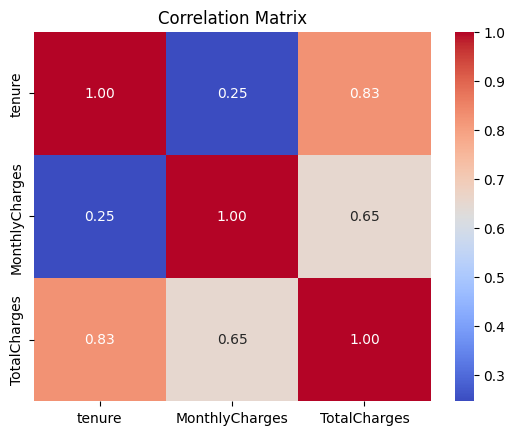

In [28]:
# Calculate the correlation matrix
corr_matrix = df[num_vars].corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [29]:
## Reach out if there is null values in dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

***
___

In [30]:
# import libraries

## Utilities to create Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

## Utilities to preprocess data
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

## Utilities to evaluate models
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Utilities to load models:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [31]:
## Split data into train and test
data = df.copy()
obj_var = 'Churn'
cat_vars = [v for v in cat_vars if obj_var != v]

# define input and target variables
X = data[cat_vars + num_vars]
y = data[obj_var].map({"No":0, "Yes":1})

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelo 1: Random Forest - Preparación de datos

In [32]:
# define pipeline to process the models
preprocessing_cat_var = Pipeline([
    ("inpute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

preprocessing_num_var = Pipeline([
    ("inpute", SimpleImputer(strategy="median")),
    ("minmax", MinMaxScaler()),
    # ("pca", PCA(n_components=1)),
])

preprocessing  = ColumnTransformer([
    ("cat_var", preprocessing_cat_var, cat_vars),
    ("num_var", preprocessing_num_var, num_vars),
    # ("var_no_transform", "passthrough", ["education.num"])
])

### Modelo 1: Random Forest - Construcción del modelo

In [33]:
model = Pipeline([
    ("undersampling", RandomUnderSampler(sampling_strategy=1, random_state=42, replacement=False)),
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(max_depth=5))
])

# entrenamos el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('undersampling',
                 RandomUnderSampler(random_state=42, sampling_strategy=1)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat_var',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneServic...
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num_var',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('random_forest', RandomForestClassifier(max_depth=5))])

### Modelo 1: Random Forest - Aplicación de un esquema de validación del modelo


In [34]:
# predicciones
y_trian_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1033
           1       0.49      0.82      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407



In [35]:
## Cross validation scores
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

scoring = {
    "precision_class_1" :make_scorer(precision_score, pos_label=1),
    "precision_class_0" :make_scorer(precision_score, pos_label=0),
    "recall_class_1"    :make_scorer(recall_score, pos_label=1),
    "recall_class_0"    :make_scorer(recall_score, pos_label=0),
    "f1_score_class_1"  :make_scorer(f1_score, pos_label=1),
    "f1_score_class_0"  :make_scorer(f1_score, pos_label=0),
}

cross_val_randomforest = cross_validate(model, X, y, scoring=scoring, cv=5, return_train_score=True)
cross_val_randomforest = pd.DataFrame(cross_val_randomforest)
cross_val_randomforest

,fit_time,score_time,test_precision_class_1,train_precision_class_1,test_precision_class_0,train_precision_class_0,test_recall_class_1,train_recall_class_1,test_recall_class_0,train_recall_class_0,test_f1_score_class_1,train_f1_score_class_1,test_f1_score_class_0,train_f1_score_class_0
0,0.737181,0.087022,0.505618,0.510498,0.924745,0.920213,0.842246,0.829431,0.701839,0.712107,0.631896,0.632008,0.798019,0.802894
1,0.643160,0.092026,0.519793,0.519280,0.912833,0.914008,0.807487,0.810702,0.729913,0.728329,0.632461,0.633063,0.811189,0.810672
2,0.631273,0.091908,0.482812,0.520332,0.916449,0.924751,0.828418,0.838235,0.679574,0.720097,0.610069,0.642089,0.780434,0.809692
3,0.662291,0.074898,0.492334,0.511083,0.896215,0.915611,0.772727,0.817391,0.711240,0.717018,0.601457,0.628924,0.793085,0.804236
4,0.610300,0.081021,0.507692,0.512778,0.906212,0.921562,0.794118,0.832107,0.720930,0.713871,0.619395,0.634532,0.803022,0.804529


In [36]:
cross_val_randomforest.mean()

fit_time                   0.656841
score_time                 0.085375
test_precision_class_1     0.501650
train_precision_class_1    0.514794
test_precision_class_0     0.911291
train_precision_class_0    0.919229
test_recall_class_1        0.808999
train_recall_class_1       0.825573
test_recall_class_0        0.708699
train_recall_class_0       0.718284
test_f1_score_class_1      0.619056
train_f1_score_class_1     0.634123
test_f1_score_class_0      0.797150
train_f1_score_class_0     0.806405
dtype: float64

### Modelo 2: XGBoost - Preparación de datos

In [37]:
# define pipeline to process the models
preprocessing_cat_var = Pipeline([
    ("inpute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

preprocessing_num_var = Pipeline([
    ("inpute", SimpleImputer(strategy="median")),
    ("minmax", MinMaxScaler()),
    # ("pca", PCA(n_components=1)),
])

preprocessing  = ColumnTransformer([
    ("cat_var", preprocessing_cat_var, cat_vars),
    ("num_var", preprocessing_num_var, num_vars),
    # ("var_no_transform", "passthrough", ["education.num"])
])

### Modelo 2: XGBoost - Construcción del modelo

In [38]:
model_xgb = Pipeline([
    ("undersampling", RandomUnderSampler(sampling_strategy=1, random_state=42, replacement=False)),
    ("preprocessing", preprocessing),
    ("xgboost", XGBClassifier(max_depth=5))
])

# entrenamos el modelo
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('undersampling',
                 RandomUnderSampler(random_state=42, sampling_strategy=1)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat_var',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneServic...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

### Modelo 2: XGBoost - Aplicación de un esquema de validación del modelo


In [39]:
# predicciones
y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)

# classification report
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.47      0.76      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.73      1407



In [40]:
## Cross validation scores
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

scoring = {
    "precision_class_1" :make_scorer(precision_score, pos_label=1),
    "precision_class_0" :make_scorer(precision_score, pos_label=0),
    "recall_class_1"    :make_scorer(recall_score, pos_label=1),
    "recall_class_0"    :make_scorer(recall_score, pos_label=0),
    "f1_score_class_1"  :make_scorer(f1_score, pos_label=1),
    "f1_score_class_0"  :make_scorer(f1_score, pos_label=0),
}

cross_val_xgboost = cross_validate(model_xgb, X, y, scoring=scoring, cv=5, return_train_score=True)
cross_val_xgboost = pd.DataFrame(cross_val_xgboost)
cross_val_xgboost

,fit_time,score_time,test_precision_class_1,train_precision_class_1,test_precision_class_0,train_precision_class_0,test_recall_class_1,train_recall_class_1,test_recall_class_0,train_recall_class_0,test_f1_score_class_1,train_f1_score_class_1,test_f1_score_class_0,train_f1_score_class_0
0,0.355086,0.072017,0.501724,0.613442,0.899637,0.981149,0.778075,0.958528,0.720232,0.781356,0.610063,0.748108,0.800000,0.869929
1,0.230058,0.061014,0.496283,0.627846,0.876870,0.981742,0.713904,0.959197,0.737657,0.794189,0.585526,0.758931,0.801262,0.878062
2,0.239063,0.057013,0.478032,0.629307,0.879331,0.984098,0.729223,0.964572,0.712488,0.794189,0.577495,0.761679,0.787166,0.879003
3,0.297074,0.061011,0.496516,0.618427,0.893029,0.978346,0.762032,0.951839,0.719961,0.787461,0.601266,0.749737,0.797210,0.872586
4,0.215053,0.057015,0.509294,0.617003,0.884793,0.982408,0.732620,0.961204,0.744186,0.784072,0.600877,0.751569,0.808421,0.872106


In [41]:
cross_val_xgboost.mean()

fit_time                   0.267267
score_time                 0.061614
test_precision_class_1     0.496370
train_precision_class_1    0.621205
test_precision_class_0     0.886732
train_precision_class_0    0.981549
test_recall_class_1        0.743171
train_recall_class_1       0.959068
test_recall_class_0        0.726905
train_recall_class_0       0.788253
test_f1_score_class_1      0.595045
train_f1_score_class_1     0.754005
test_f1_score_class_0      0.798812
train_f1_score_class_0     0.874337
dtype: float64

### Análisis de los resultados y comparación

Se encuentra que:

In [42]:
rf_results = pd.DataFrame(cross_val_randomforest.mean(), columns=['random_forest'])
xgb_results = pd.DataFrame(cross_val_xgboost.mean(), columns=['xgboost'])

final_results = pd.merge(rf_results, xgb_results, how='inner', left_index=True, right_index=True)
final_results

,random_forest,xgboost
fit_time,0.656841,0.267267
score_time,0.085375,0.061614
test_precision_class_1,0.501650,0.496370
train_precision_class_1,0.514794,0.621205
test_precision_class_0,0.911291,0.886732
train_precision_class_0,0.919229,0.981549
test_recall_class_1,0.808999,0.743171
train_recall_class_1,0.825573,0.959068
test_recall_class_0,0.708699,0.726905
train_recall_class_0,0.718284,0.788253


La tabla presentada compara el rendimiento de dos algoritmos populares de aprendizaje automático, Random Forest y XGBoost, en una tarea de predicción de churn. El churn, en este contexto, se refiere a la acción de un cliente de dejar de utilizar un servicio, en este caso, un plan de internet. Ambos algoritmos han sido evaluados utilizando una validación cruzada de 5 folds sobre un conjunto de datos de clientes.

**Métricas de Evaluación**

Las métricas utilizadas para evaluar el rendimiento de ambos modelos son comunes en problemas de clasificación binaria. Entre ellas destacan:

* Precisión: Mide la proporción de predicciones positivas (churn) que son correctas.
* Recall: Mide la proporción de casos positivos reales (churn) que fueron correctamente identificados.
* F1-score: Es la media armónica de precisión y recall, proporcionando un equilibrio entre ambos.


**Análisis de Resultados**

* Overfitting: Tanto Random Forest como XGBoost muestran un ligero overfitting, es decir, el rendimiento en el conjunto de entrenamiento es ligeramente mejor que en el conjunto de prueba. Esto es común en modelos de aprendizaje automático y puede mitigarse con técnicas de regularización o ajustando los hiperparámetros.
* XGBoost: XGBoost presenta un mayor nivel de overfitting en comparación con Random Forest, especialmente en términos de precisión y recall para la clase positiva (churn). Esto sugiere que XGBoost podría estar capturando demasiado ruido en los datos de entrenamiento.

**Comparación entre Algoritmos:**

* Precisión: Ambos algoritmos obtienen una precisión similar para la clase negativa (no churn), pero XGBoost tiene una ligera ventaja en la clase positiva.
* Recall: Random Forest tiene un mejor recall para la clase positiva, lo que significa que identifica una mayor proporción de casos de churn reales.
* F1-score: El F1-score es similar para ambos algoritmos en la clase negativa, pero Random Forest tiene una ligera ventaja en la clase positiva.

**Interpretación del Churn**

Dado que el churn es un evento relativamente poco frecuente, los datos están desbalanceados. Esto puede afecta el rendimiento de los modelos, ya que los algoritmos pueden tender a predecir la clase mayoritaria (no churn) con mayor facilidad.

Es importante considerar los costos asociados a falsos positivos (predecir churn cuando no ocurre) y falsos negativos (no predecir churn cuando ocurre). Por ejemplo, si el costo de un falso negativo es alto (perder un cliente), se priorizará el recall.

**Conclusiones**

Basado en los resultados presentados, Random Forest parece ser ligeramente mejor que XGBoost en términos de recall para la clase positiva (churn), lo que puede ser importante si el costo de un falso negativo es alto. Sin embargo, XGBoost tiene una ligera ventaja en términos de precisión para la clase positiva.

Es importante destacar que estos resultados son específicos para este conjunto de datos y configuración experimental. Para obtener conclusiones más sólidas, se recomienda realizar un análisis más detallado, incluyendo una exploración de los hiperparámetros, la evaluación de diferentes técnicas de balanceo de clases y la consideración de otros algoritmos.